In [1]:
import numpy as np

from indcomp import MAIC
from indcomp.datasets import load_NICE_DSU18

df_ind, df_tar = load_NICE_DSU18()
df_tar["age.min"] = 46
df_tar["age.max"] = 70
df_tar["var.min"] = 10
df_tar["var.max"] = 20
np.random.seed(0)
df_ind["var"] = np.random.randint(5, 25, len(df_ind))

df_AB_IPD, df_AC_AgD = df_ind, df_tar
print(df_AB_IPD.sample(5))
print(df_AC_AgD.round(2))

      ID  age  gender trt  y  var
273   24   63  Female   B  0    5
53    54   66  Female   A  1    9
191  192   57  Female   A  1   16
69    70   49  Female   A  1   15
496  247   61    Male   B  0   19
   age.mean  age.sd  N.male  prop.male  y.A.sum  y.A.bar  N.A  y.C.sum  \
0     50.27    3.12      68       0.23      125     0.83  150       21   

   y.C.bar  N.C  age.min  age.max  var.min  var.max  
0     0.14  150       46       70       10       20  


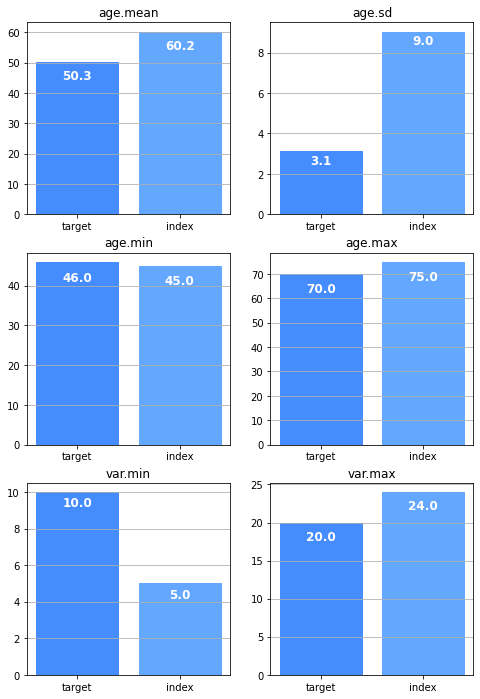

In [2]:
maic = MAIC(
    df_index=df_AB_IPD,
    df_target=df_AC_AgD,
    match={
        "age.mean": ("mean", "age"),
        "age.sd": ("std", "age", "age.mean"),
        "age.min": ("min", "age"),
        "age.max": ("max", "age"),
        "var.min": ("min", "var"),
        "var.max": ("max", "var")
    },
)
fig = maic.compare_populations(ncols=2)
fig

Original sample size       : 500
Effective Sample Size (ESS): 87.20
Count zero weights         : 291


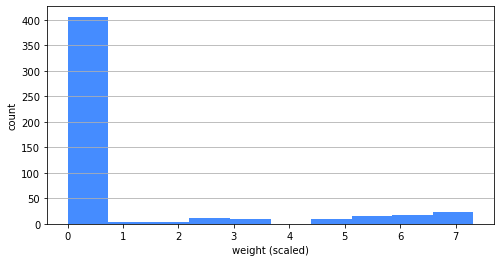

In [3]:
maic.calc_weights()
print(f"Original sample size       : {len(df_AB_IPD)}")
print(f"Effective Sample Size (ESS): {maic.ESS_:.2f}")
print(f"Count zero weights         : {(maic.weights_ == 0).sum()}")
fig = maic.plot_weights()
fig

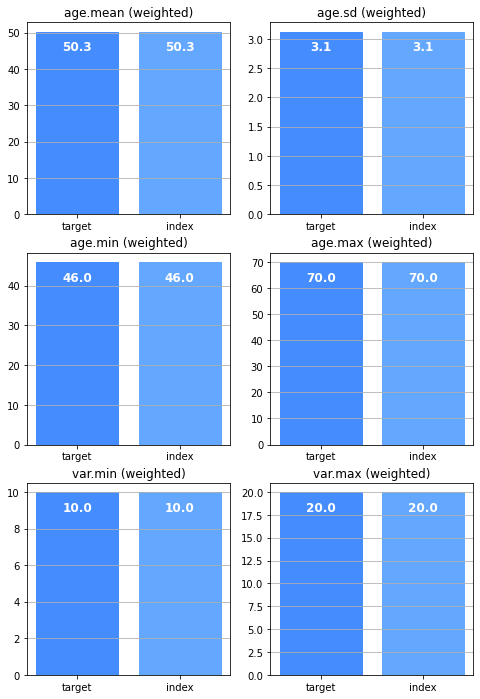

In [4]:
fig = maic.compare_populations(weighted=True, ncols=2)
fig